# Edge detection
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_03_edge_detection/edge_detection.ipynb)



In [25]:
# to run in google colab
import sys

if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_03_edge_detection/Bikesgray.jpg".split()
    )

# save plotly as html frames
import plotly.io as pio

if (pio.renderers.default != "vscode") & (pio.renderers.default != "colab"):
    pio.renderers.default = "iframe_connected"


In [26]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import plotly.express as px

figsize = (10, 10)



## Original image


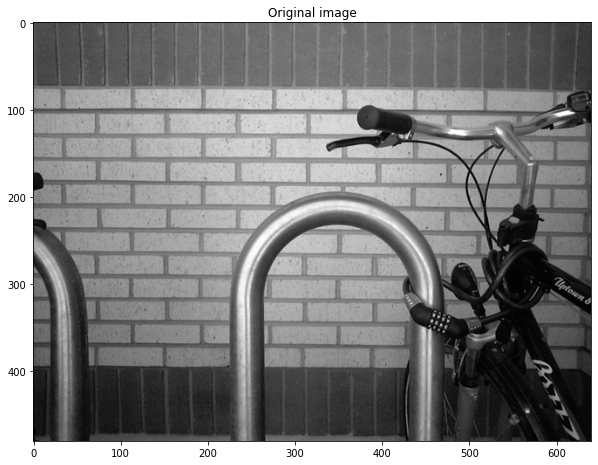

In [27]:
img = cv2.imread("Bikesgray.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=figsize)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()




## Edge Detection Using Sobel Operators



### Vertical Edge

[[-0.125  0.     0.125]
 [-0.25   0.     0.25 ]
 [-0.125  0.     0.125]]


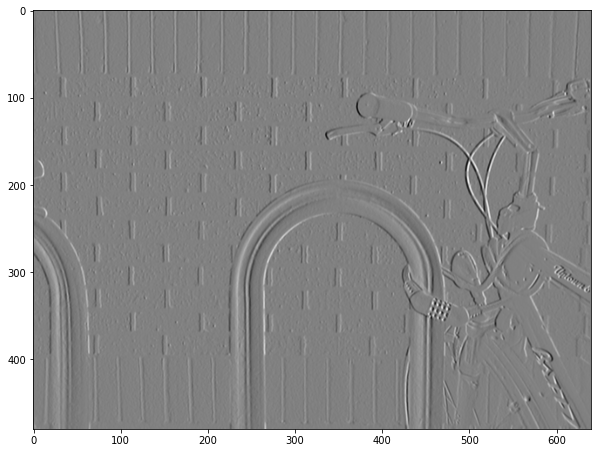

In [28]:
img = img.astype(float)

kernel = 1 / 8 * np.array([[-1, 0, +1], [-2, 0, +2], [-1, 0, +1]])
print(kernel)
sobel_x = cv2.filter2D(img, -1, kernel)
plt.figure(figsize=figsize)
plt.imshow(sobel_x, cmap='gray')


### Horizontal Edge

[[-0.125 -0.25  -0.125]
 [ 0.     0.     0.   ]
 [ 0.125  0.25   0.125]]


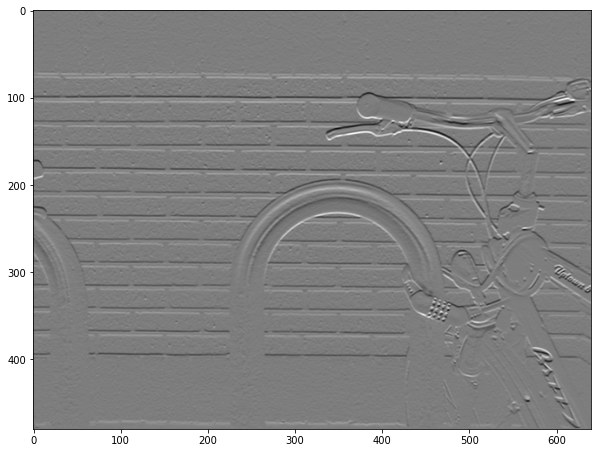

In [29]:
kernel = kernel.T
print(kernel)
sobel_y = cv2.filter2D(img, -1, kernel)
plt.figure(figsize=figsize)
plt.imshow(sobel_y, cmap='gray')

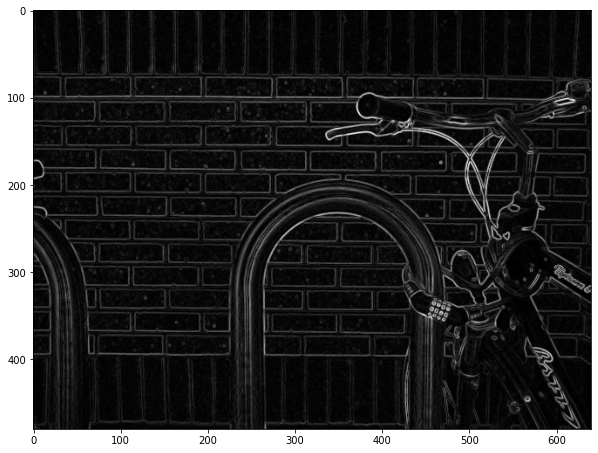

In [30]:
mag_img = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
plt.figure(figsize=figsize)
plt.imshow(mag_img, cmap='gray')

### Homework
Above section "Edge Detection Using Sobel Operators" shows how sobel operator works in depth, now let's just call opencv's function:  
Sobel(	src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]	) ->	dst to do the same edge detection in multiple same steps

Refer to: c_01_intro_to_CV_and_Python/introduction-to-opencv/notebooks/2-Image_stats_and_image_processing.ipynb
```
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobelx,cmap = 'gray') 
```


## <font color="red">TODO: Your Code below, feel free to add more blocks by clicking '+ Code" </font>

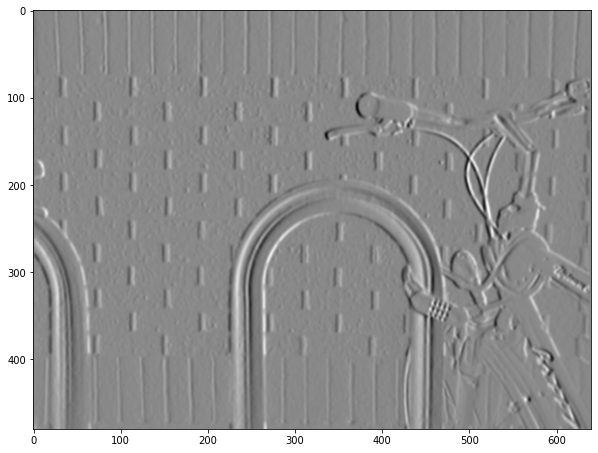

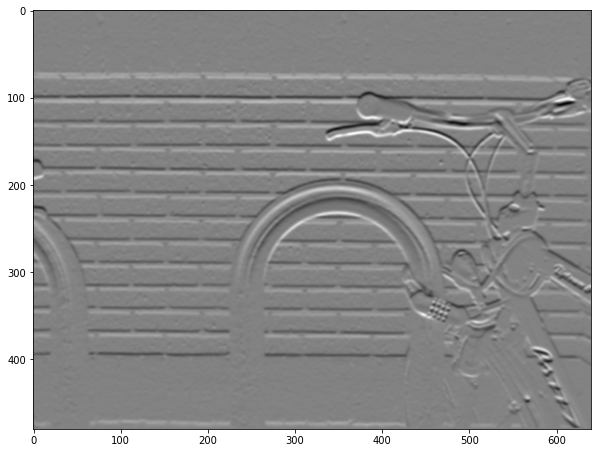

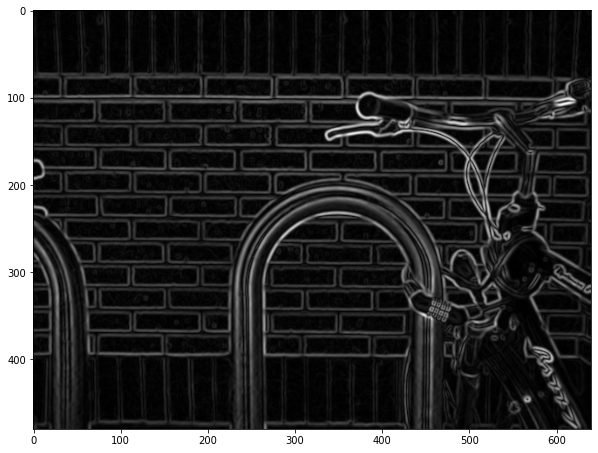

In [34]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=9)
plt.figure(figsize=figsize)
plt.imshow(sobelx, cmap='gray')

sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=9)
plt.figure(figsize=figsize)
plt.imshow(sobely, cmap='gray')

mag = np.sqrt(sobelx**2+sobely**2)
plt.figure(figsize=figsize)
plt.imshow(mag, cmap='gray')

## cv2 Canny
let's see the results from the default canny of cv2


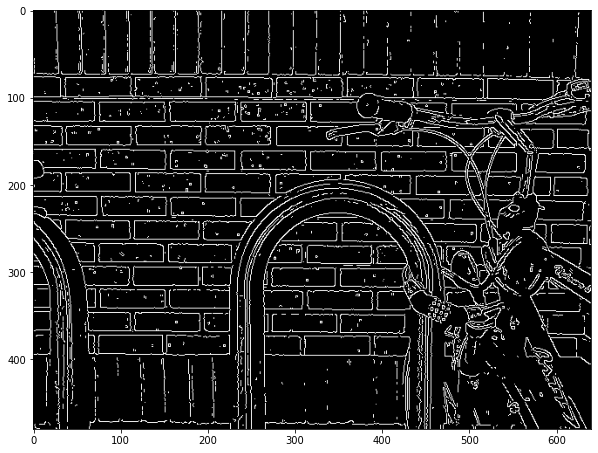

In [31]:
res = cv2.Canny(img.astype(np.uint8), 105, 120)
plt.figure(figsize=figsize)
plt.imshow(res, cmap='gray')